In [ ]:
import keras
from keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import cv2
import matplotlib.pyplot as plt
import os

121_0121MR0007560150200728E01_DXXX.jpg
121_0121MR0007560110200724E01_DXXX.jpg
121_0121MR0007560020200715E01_DXXX.jpg
121_0121MR0007570080200745E01_DXXX.jpg
121_0121MR0007570090200746E01_DXXX.jpg
(5, 256, 256, 3)


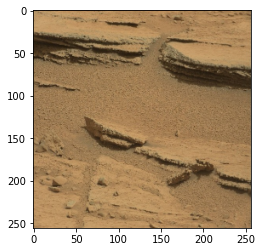

In [ ]:
np.random.seed(42)
img_size=256
img_data=[]
for file in[file for file in os.listdir("/content/drive/MyDrive/image")][:5]:
  print(file)
  img=cv2.imread(f'/content/drive/MyDrive/image/{file}')
  rgb_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  rgb_img=cv2.resize(rgb_img, (256,256))
  plt.imshow(rgb_img)
  img_data.append(img_to_array(rgb_img))
  img_final=np.reshape(img_data, (len(img_data),256, 256, 3))
  img_final=img_final.astype('float32')
  
print(img_final.shape)


In [ ]:
import keras
from keras import layers
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Dense

import cv2


In [ ]:
from PIL import Image
from numpy import asarray
inp = keras.layers.Input(shape=(256,256,3))
A=Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(256,256,3))(inp)

B=MaxPooling2D((2,2), padding='same')(A)
C=Conv2D(32, (3,3),activation='relu',padding='same')(B)
D=layers.MaxPooling2D((2,2), padding='same')(C)
E=Conv2D(16, (3,3),activation='relu',padding='same')(D)
F=MaxPooling2D((2,2), padding='same')(E)
encoder = Model(inputs = inp,outputs= F)

G=Conv2D(16, (3,3), activation='relu', padding='same')(F)
H=UpSampling2D((2,2))(G)

I=Conv2D(32, (3,3), activation='relu', padding='same')(H)
J=UpSampling2D((2,2))(I)

K=Conv2D(64, (3,3), activation='relu', padding='same')(J)
L=UpSampling2D((2,2))(K)

M=Conv2D(3, (3,3), activation='relu', padding='same')(L)

autoencoder = Model(inputs =inp,outputs = M)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624

In [ ]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624  

In [ ]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
autoencoder.fit(img_final, img_final, epochs=100, shuffle=True)

Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 14312.1221 - accuracy: 2.9907e-04
Epoch 2/100
1/1 [==============================] - 0s 38ms/step - loss: 11752.3574 - accuracy: 1.5259e-04
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 11749.7734 - accuracy: 1.5259e-04
Epoch 4/100
1/1 [==============================] - 0s 35ms/step - loss: 11231.2686 - accuracy: 1.5259e-04
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 10875.4512 - accuracy: 1.5259e-04
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 10957.2383 - accuracy: 1.6479e-04
Epoch 7/100
1/1 [==============================] - 0s 33ms/step - loss: 10171.8418 - accuracy: 1.5259e-04
Epoch 8/100
1/1 [==============================] - 0s 33ms/step - loss: 8941.9521 - accuracy: 1.5259e-04
Epoch 9/100
1/1 [==============================] - 0s 34ms/step - loss: 8772.4111 - accuracy: 1.5259e-04
Epoch 10/100
1/1 [==============================

In [ ]:
autoencoder.save('directory.h5')

encoder.save_weights("encoder_weights_ckpt")

#decoder.save_weights("decoder_weights_ckpt")

In [ ]:
model_encoder = keras.Sequential([encoder])
model_encoder.summary()

encoder.load_weights("encoder_weights_ckpt")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 32, 32, 16)        24880     
                                                                 
Total params: 24,880
Trainable params: 24,880
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model_decoder = keras.Sequential([decoder])
# model_decoder.summary()

# decoder.load_weights("decoder_weights_ckpt")

In [ ]:
output = autoencoder.predict(img_final)
# encode = encoder.predict(img_final)

In [ ]:
output

array([[[[ 50.308258,  35.718613,  24.592342],
         [ 61.18036 ,  48.88641 ,  37.95201 ],
         [ 70.41882 ,  48.201626,  39.40614 ],
         ...,
         [ 71.57808 ,  44.99234 ,  36.503525],
         [ 64.44348 ,  40.911133,  36.186474],
         [ 48.558384,  31.754488,  33.366142]],

        [[ 85.469345,  64.79496 ,  50.119644],
         [101.25173 ,  93.708755,  63.625957],
         [110.47565 ,  93.88242 ,  65.679596],
         ...,
         [122.45761 ,  96.25504 ,  58.651466],
         [114.71915 ,  92.747055,  57.746464],
         [ 90.22789 ,  72.9926  ,  52.822773]],

        [[101.4654  ,  74.63313 ,  54.584496],
         [115.78668 , 101.607635,  67.953384],
         [122.46844 ,  99.821236,  72.842064],
         ...,
         [127.04213 , 100.92496 ,  68.35564 ],
         [122.48068 ,  97.84725 ,  68.50869 ],
         [ 99.48525 ,  77.108406,  61.50558 ]],

        ...,

        [[124.96209 ,  98.888824,  58.826077],
         [148.69197 , 109.27662 ,  80.61989 ]

In [ ]:
output[4]

array([[[ 67.00353 ,  48.09396 ,  31.891691],
        [ 79.69448 ,  64.09854 ,  47.72737 ],
        [ 91.26583 ,  63.66502 ,  50.918465],
        ...,
        [ 72.55697 ,  46.315815,  36.597176],
        [ 65.29854 ,  41.59587 ,  36.271008],
        [ 48.970844,  31.637682,  33.823254]],

       [[116.67052 ,  85.99939 ,  65.60501 ],
        [132.93976 , 121.86197 ,  80.41145 ],
        [144.41023 , 122.5189  ,  83.01427 ],
        ...,
        [125.103035,  97.31323 ,  58.627304],
        [117.05543 ,  93.20857 ,  57.56249 ],
        [ 91.30336 ,  72.55013 ,  53.418865]],

       [[137.7567  ,  98.22942 ,  72.15768 ],
        [151.35222 , 129.47696 ,  85.77668 ],
        [157.19089 , 126.388176,  93.429146],
        ...,
        [129.10556 , 101.63848 ,  68.31334 ],
        [124.34936 ,  98.45333 ,  68.26328 ],
        [100.25995 ,  76.90203 ,  62.38625 ]],

       ...,

       [[133.87474 , 105.93623 ,  63.222538],
        [159.78987 , 117.81206 ,  87.31024 ],
        [169.06218 , 1

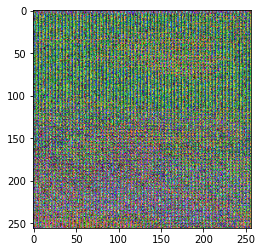

In [ ]:
img = Image.fromarray(output[4], 'RGB')
plt.imshow(img)

(5, 32, 32, 16)


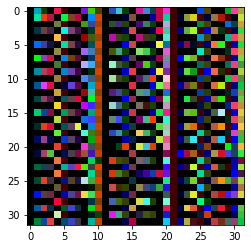

In [ ]:
enc  = encoder.predict(img_final)
enc_img = Image.fromarray(enc[4], 'RGB')
plt.imshow(enc_img)
print(enc.shape)

In [ ]:
enc[4]
enc[4].shape

(32, 32, 16)

In [ ]:
enc.reshape(32,32,-1)

array([[[1.52543961e+02, 4.54390793e+01, 4.28710327e+01, ...,
         4.90844202e+00, 0.00000000e+00, 0.00000000e+00],
        [1.28755219e+02, 2.75735073e+01, 3.27141685e+01, ...,
         3.87672544e+00, 0.00000000e+00, 0.00000000e+00],
        [1.28681305e+02, 2.67636509e+01, 3.54656525e+01, ...,
         3.15004539e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.32361221e+02, 0.00000000e+00, 3.37655029e+01, ...,
         4.07852936e+00, 0.00000000e+00, 0.00000000e+00],
        [1.53901657e+02, 0.00000000e+00, 3.96039505e+01, ...,
         8.42628670e+00, 0.00000000e+00, 0.00000000e+00],
        [1.56654343e+02, 0.00000000e+00, 3.85354843e+01, ...,
         5.55048990e+00, 0.00000000e+00, 0.00000000e+00]],

       [[1.42254547e+02, 2.22925739e+01, 3.94528198e+01, ...,
         2.36892676e+00, 0.00000000e+00, 0.00000000e+00],
        [1.32870789e+02, 0.00000000e+00, 3.45540810e+01, ...,
         2.56561613e+00, 0.00000000e+00, 0.00000000e+00],
        [1.35342896e+02, 

In [ ]:
enc[4].shape

(32, 32, 16)

In [ ]:
enc.reshape(-1,(32,32,16))

TypeError: ignored

In [ ]:
output.reshape(-1,(256,256,3))

In [ ]:
output.shape

In [ ]:
plt.imshow(output[4])

In [ ]:
print(F)

In [ ]:
print()

In [ ]:
inpu = keras.layers.Input(shape=(256,256,3))
AA=Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(256,256,3))(inpu)

MM=Conv2D(3, (3,3), activation='relu', padding='same')(AA)

autoencoder1 = Model(inputs =inpu, outputs = AA)
autoencoder1.summary()

In [ ]:
output1 = autoencoder1.predict(img_final)


In [ ]:
output1

In [ ]:
output1[0].shape

In [ ]:
from PIL import Image
from numpy import asarray


In [ ]:
from PIL import Image
from numpy import asarray
  
  
# load the image and convert into
# numpy array

numpydata = (F)
  
# data
print(numpydata)

In [ ]:
F = F.reshape=(16,16,1)